In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pycountry
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdp-annual-growth-for-each-country-1960-2020/GDP_annual_growth.csv


# If we observed the data precisely we find that along with countries GDP we also have other some GDP of other details so first we divide the countries data

In [2]:
df=pd.read_csv('/kaggle/input/gdp-annual-growth-for-each-country-1960-2020/GDP_annual_growth.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN,NaN


In [3]:
for c in df['Country Name']:
    print(c)

Aruba
Afghanistan
Angola
Albania
Andorra
Arab World
United Arab Emirates
Argentina
Armenia
American Samoa
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas, The
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei Darussalam
Bhutan
Botswana
Central African Republic
Canada
Central Europe and the Baltics
Switzerland
Channel Islands
Chile
China
Cote d'Ivoire
Cameroon
Congo, Dem. Rep.
Congo, Rep.
Colombia
Comoros
Cabo Verde
Costa Rica
Caribbean small states
Cuba
Curacao
Cayman Islands
Cyprus
Czech Republic
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
East Asia & Pacific (excluding high income)
Early-demographic dividend
East Asia & Pacific
Europe & Central Asia (excluding high income)
Europe & Central Asia
Ecuador
Egypt, Arab Rep.
Euro area
Eritrea
Spain
Estonia
Ethiopia
European Union
Fragile and conflict affected situations
Finland
Fiji
France
Faroe Islands
Micronesia, Fed. Sts.


In [4]:
df['Country Code'].unique().size==df['Country Name'].unique().size 

True

In [5]:
list(pycountry.countries)[0]

Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')

In [6]:
countries_code=[x.alpha_3 for x in pycountry.countries]
result=df['Country Code'].isin(countries_code)
n=[]
for i in range(len(result)):
    if(result[i]==False):
        n.append(i)
len(n)

49

In [7]:
only_countries_df=df.drop(n,axis=0)
only_countries_df.count()

Country Name      215
Country Code      215
Indicator Name    215
Indicator Code    215
1960               99
                 ... 
2017              204
2018              202
2019              185
2020                0
Unnamed: 65         0
Length: 66, dtype: int64

# Year Wise Analysis

In [8]:
def get_top_20_in_year(year):
    d=only_countries_df.nlargest(20,year)[year].tolist()
    c=only_countries_df.nlargest(20,year)['Country Name'].tolist()
    plt.figure(figsize=(18,18))
    plt.title(label="GDP CONTRIBUTION OF TOP 20 Countries in "+year,fontsize=6,fontweight=10)
    plt.pie(d,labels=c,startangle=80)
    plt.show()

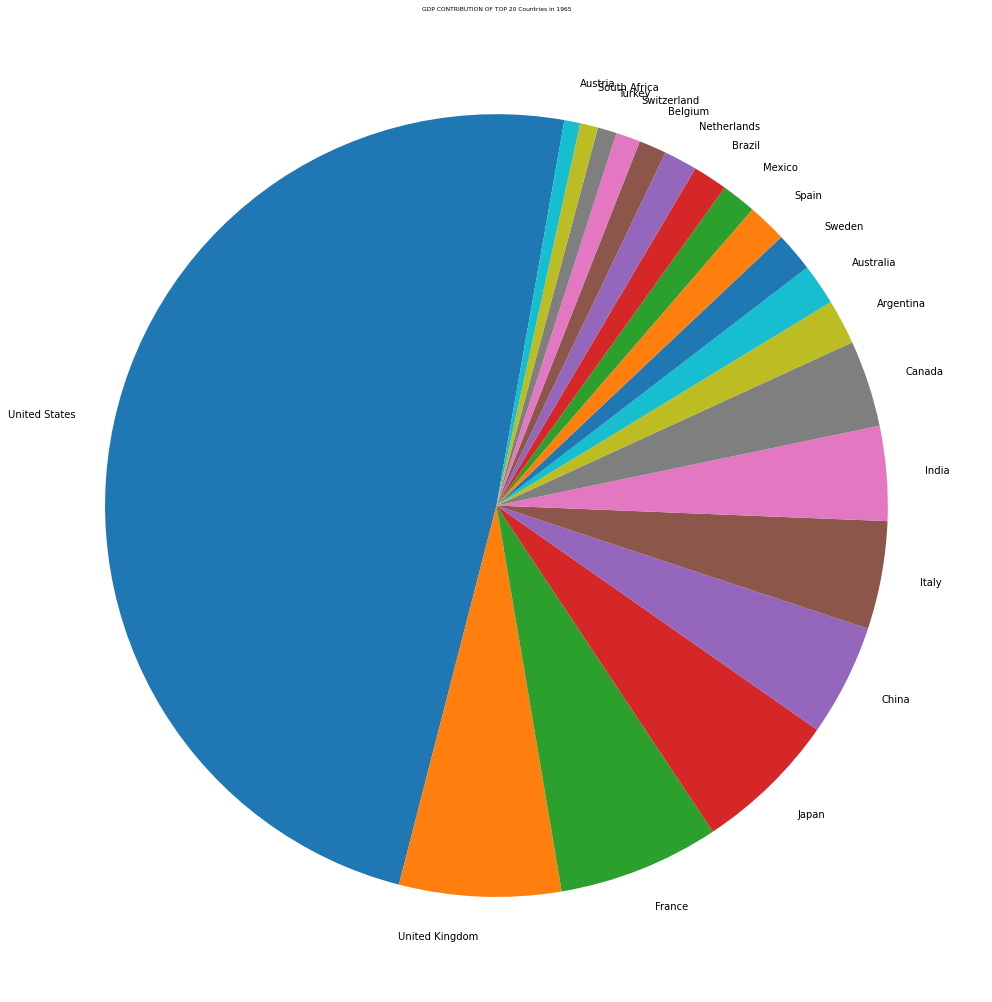

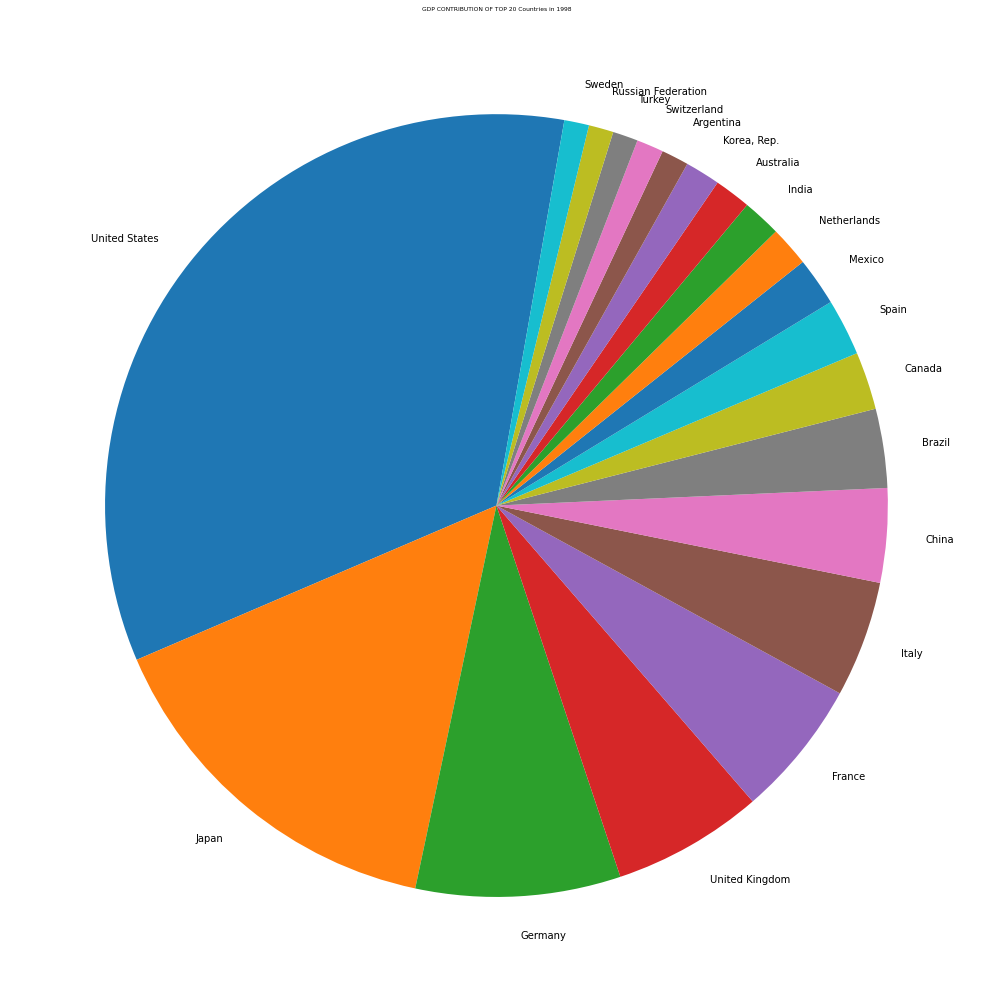

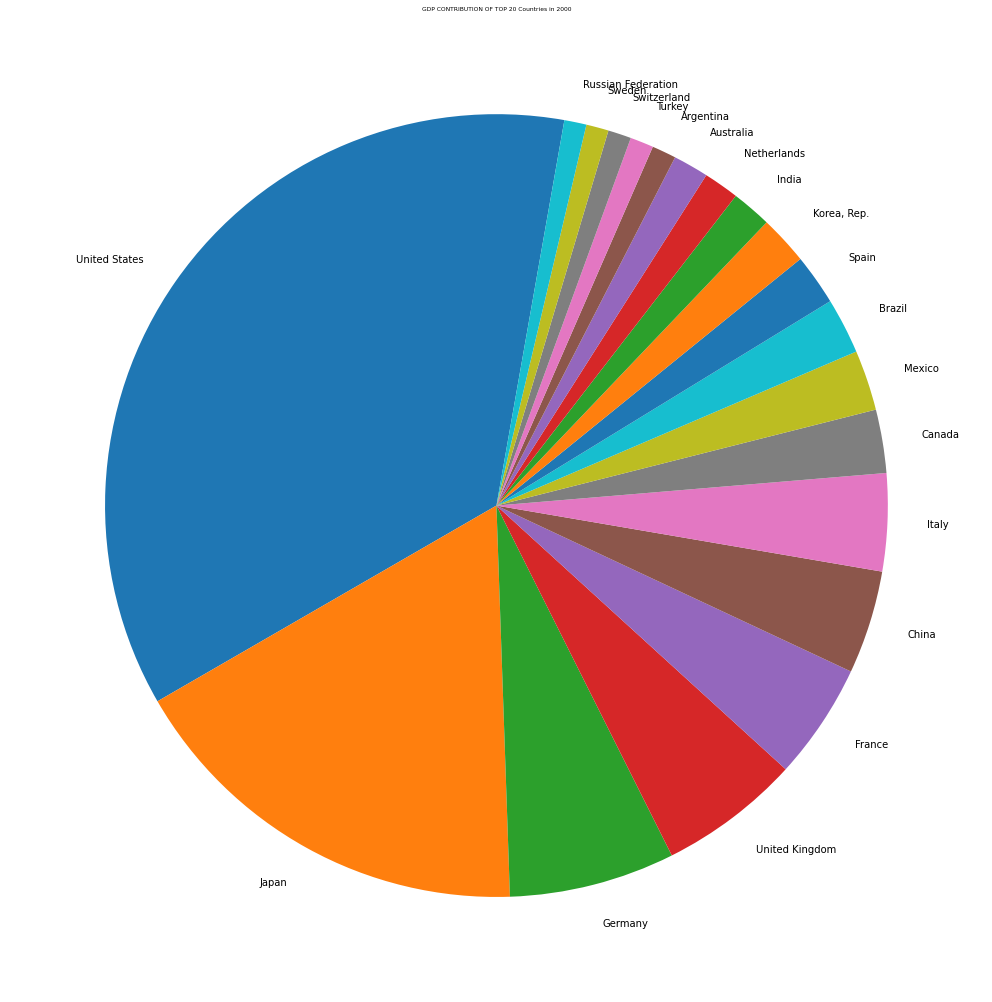

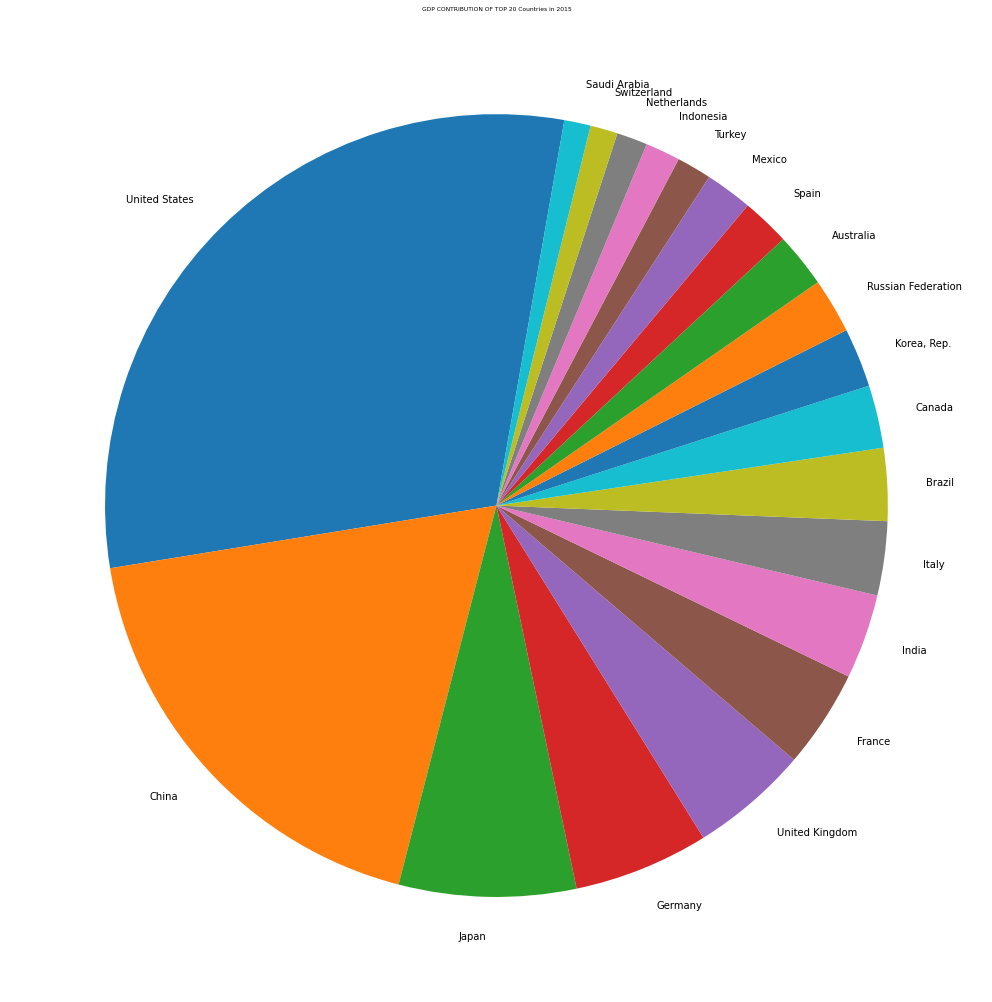

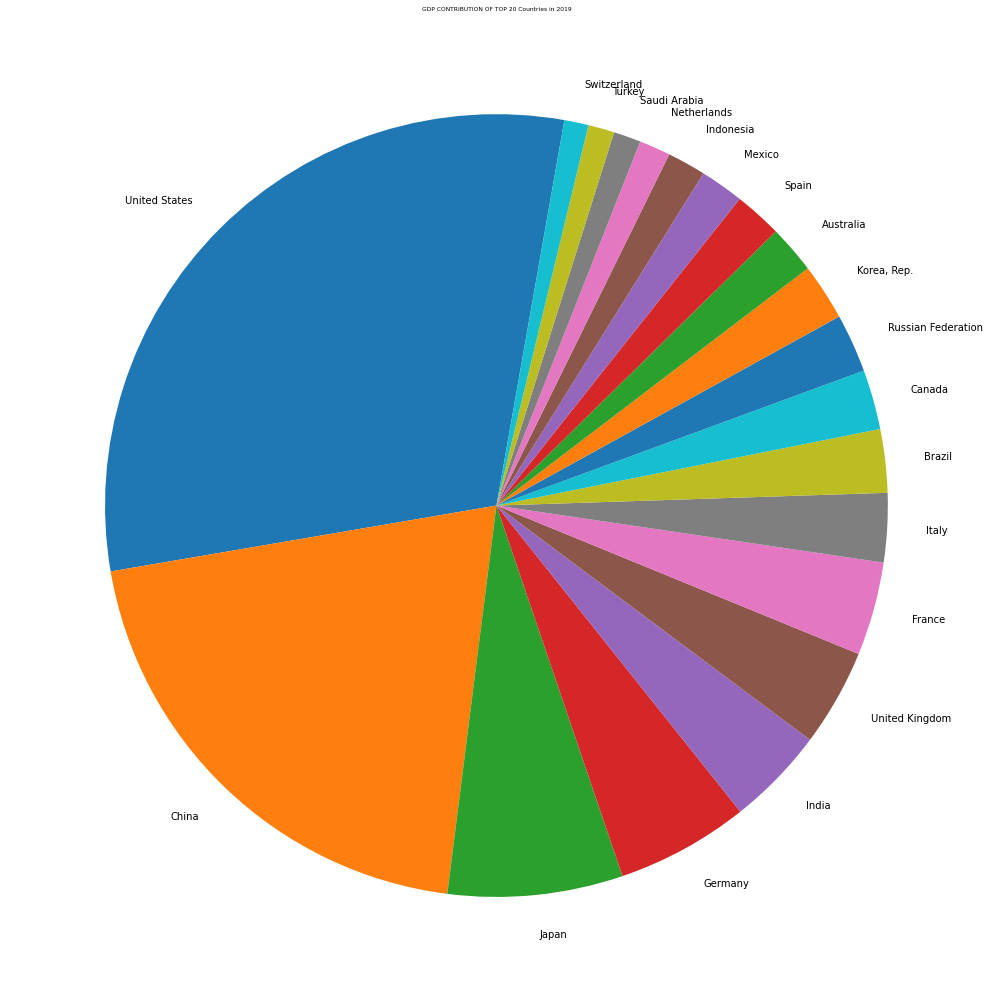

In [9]:
get_top_20_in_year('1965')
get_top_20_in_year('1998')
get_top_20_in_year("2000")
get_top_20_in_year('2015')
get_top_20_in_year('2019')

# Country Wise Analysis

In [10]:
only_countries_df.set_index('Country Name',inplace=True)


In [11]:
print(only_countries_df.loc['Japan'][3:64])

1960      44307342950.400002
1961        53508617739.3778
1962      60723018683.733299
1963      69498131797.333298
1964      81749006381.511093
                ...         
2016    4922538141454.620117
2017    4866864409657.679688
2018     4954806619995.19043
2019    5081769542379.769531
2020                     NaN
Name: Japan, Length: 61, dtype: object


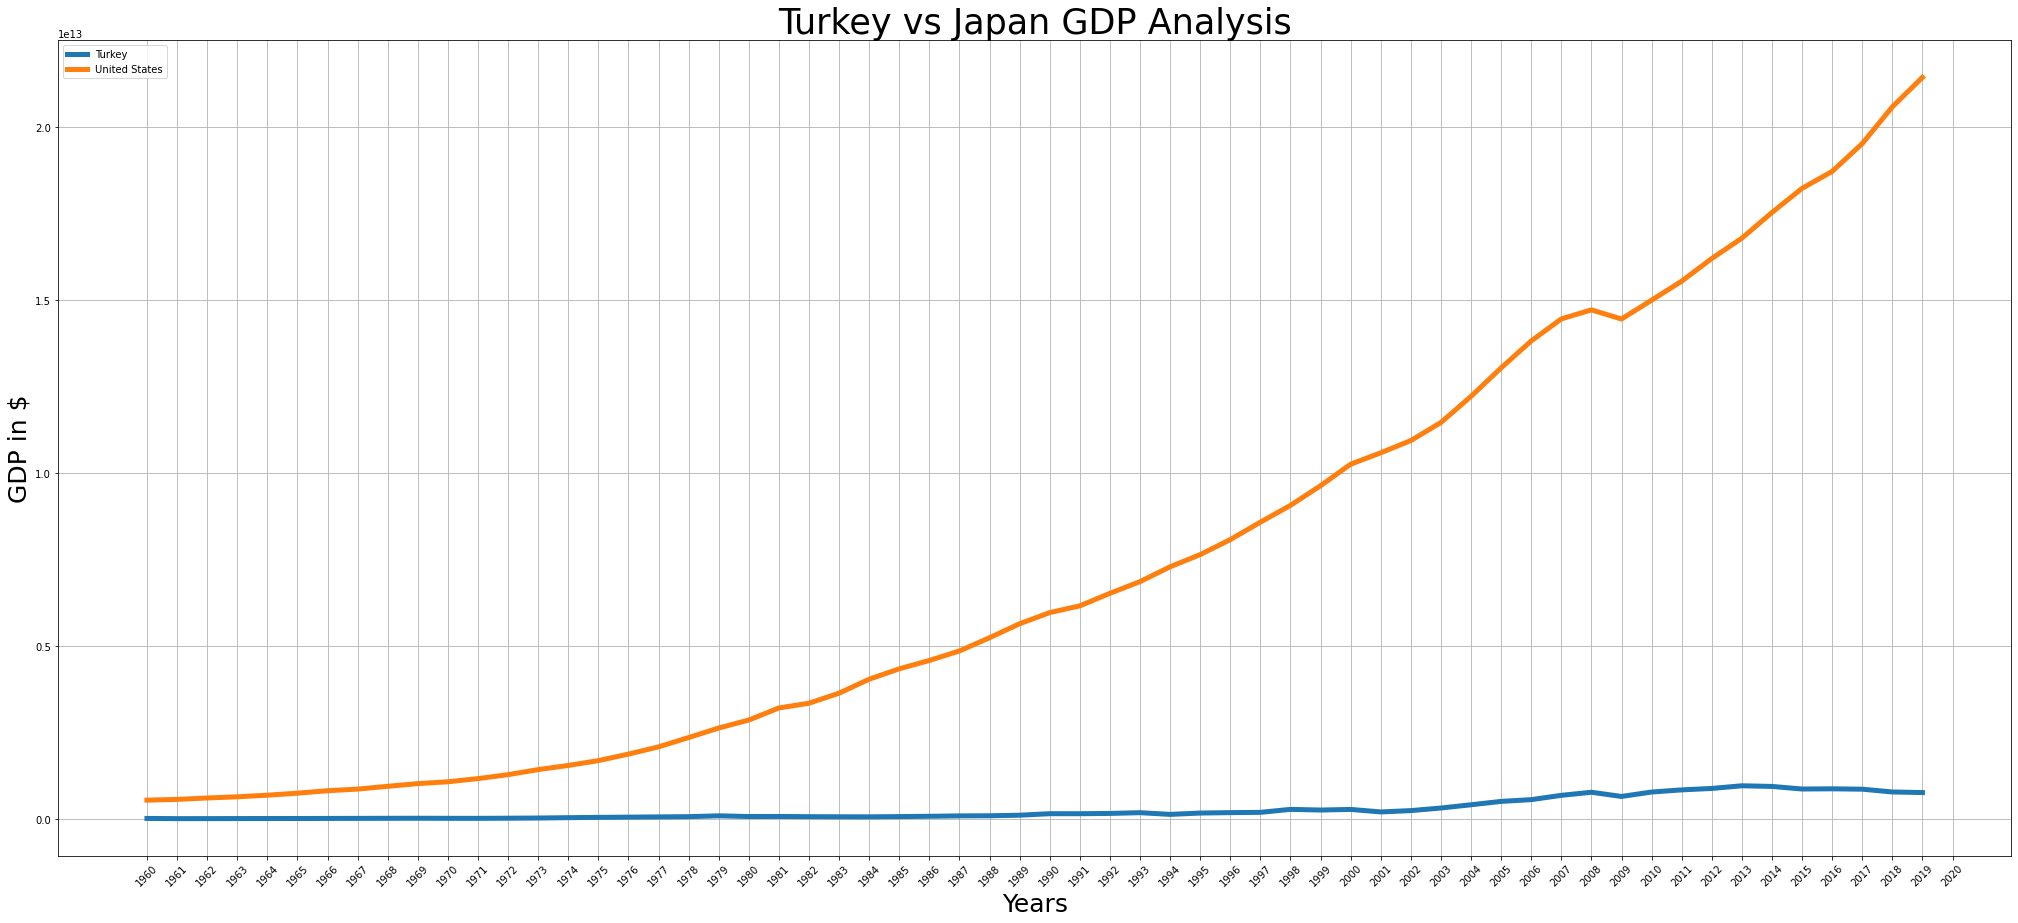

In [12]:
plt.figure(figsize=(35,15))
plt.title(label='Turkey vs Japan GDP Analysis',fontsize=35,fontweight=20)
plt.ylabel('GDP in $',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.plot(np.arange(1960,2021),only_countries_df.loc['Turkey'][3:64],linewidth=5,label='Turkey')
plt.plot(np.arange(1960,2021),only_countries_df.loc['United States'][3:64],linewidth=5,label='United States')
plt.xticks(np.arange(1960,2021),np.arange(1960,2021),rotation=45)
plt.grid()
plt.legend()
plt.show()

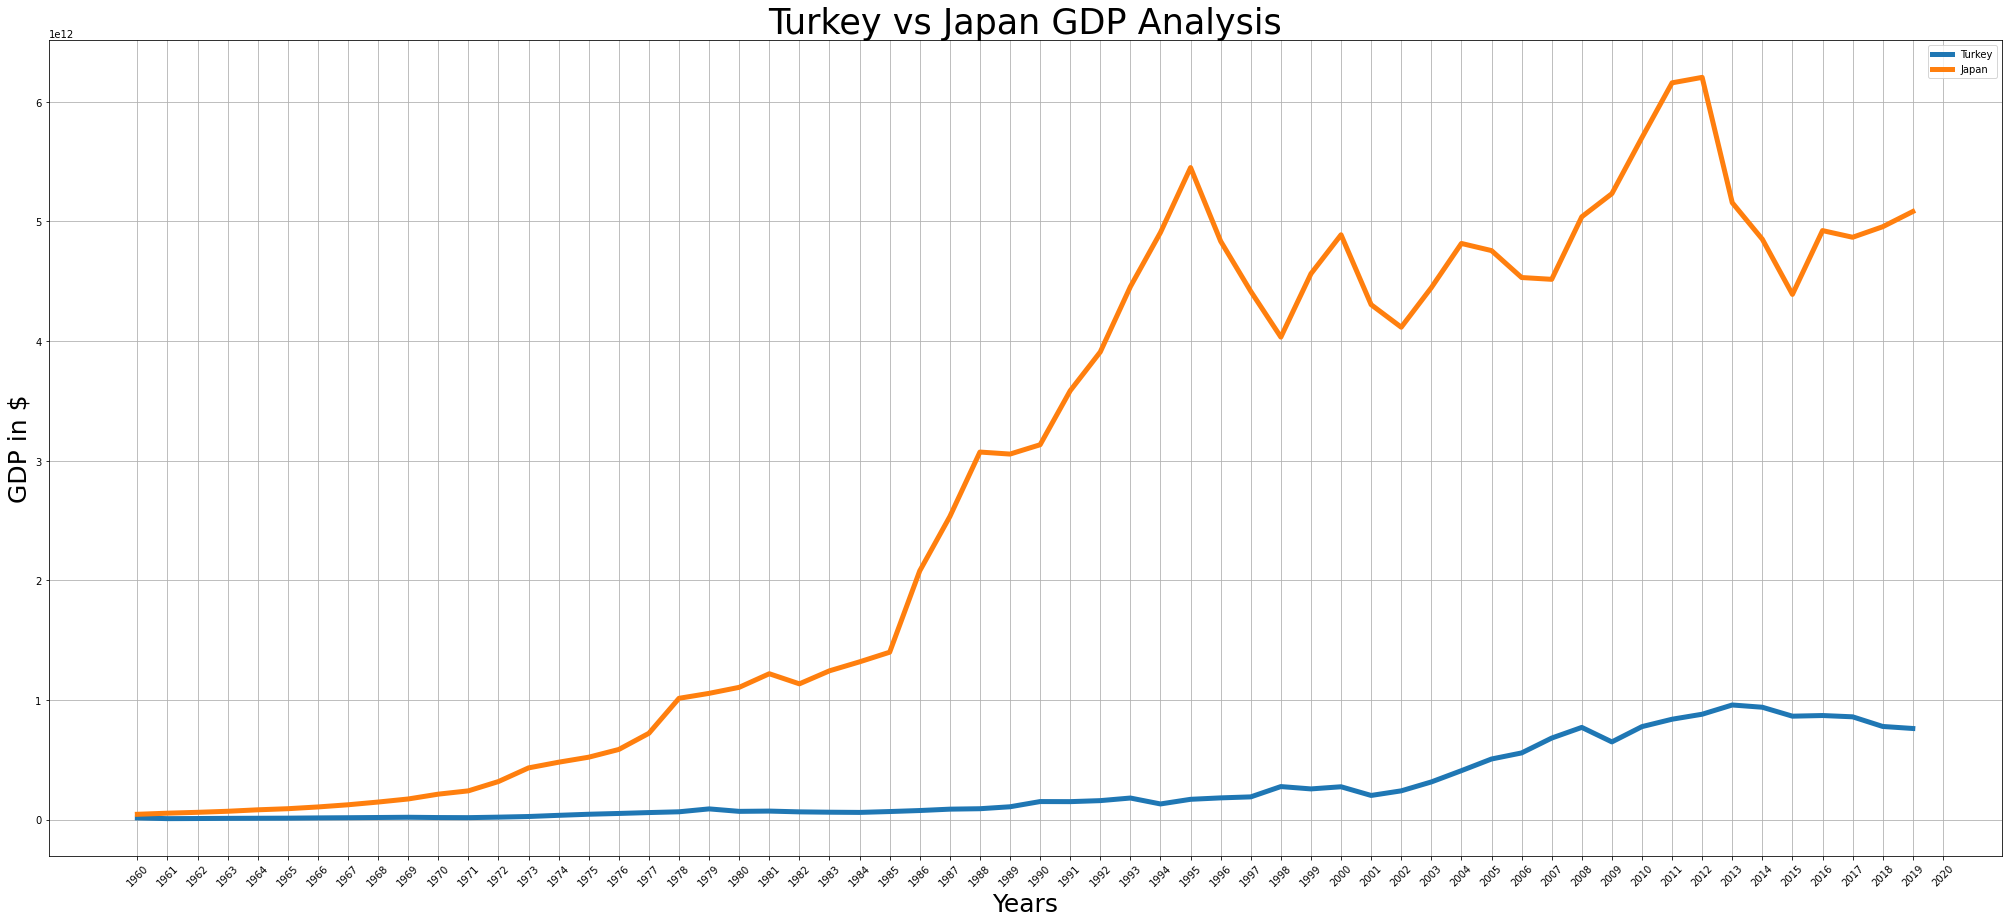

In [13]:
plt.figure(figsize=(35,15))
plt.title(label='Turkey vs Japan GDP Analysis',fontsize=35,fontweight=20)
plt.ylabel('GDP in $',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.plot(np.arange(1960,2021),only_countries_df.loc['Turkey'][3:64],linewidth=5,label='Turkey')
plt.plot(np.arange(1960,2021),only_countries_df.loc['Japan'][3:64],linewidth=5,label='Japan')
plt.xticks(np.arange(1960,2021),np.arange(1960,2021),rotation=45)
plt.grid()
plt.legend()
plt.show()

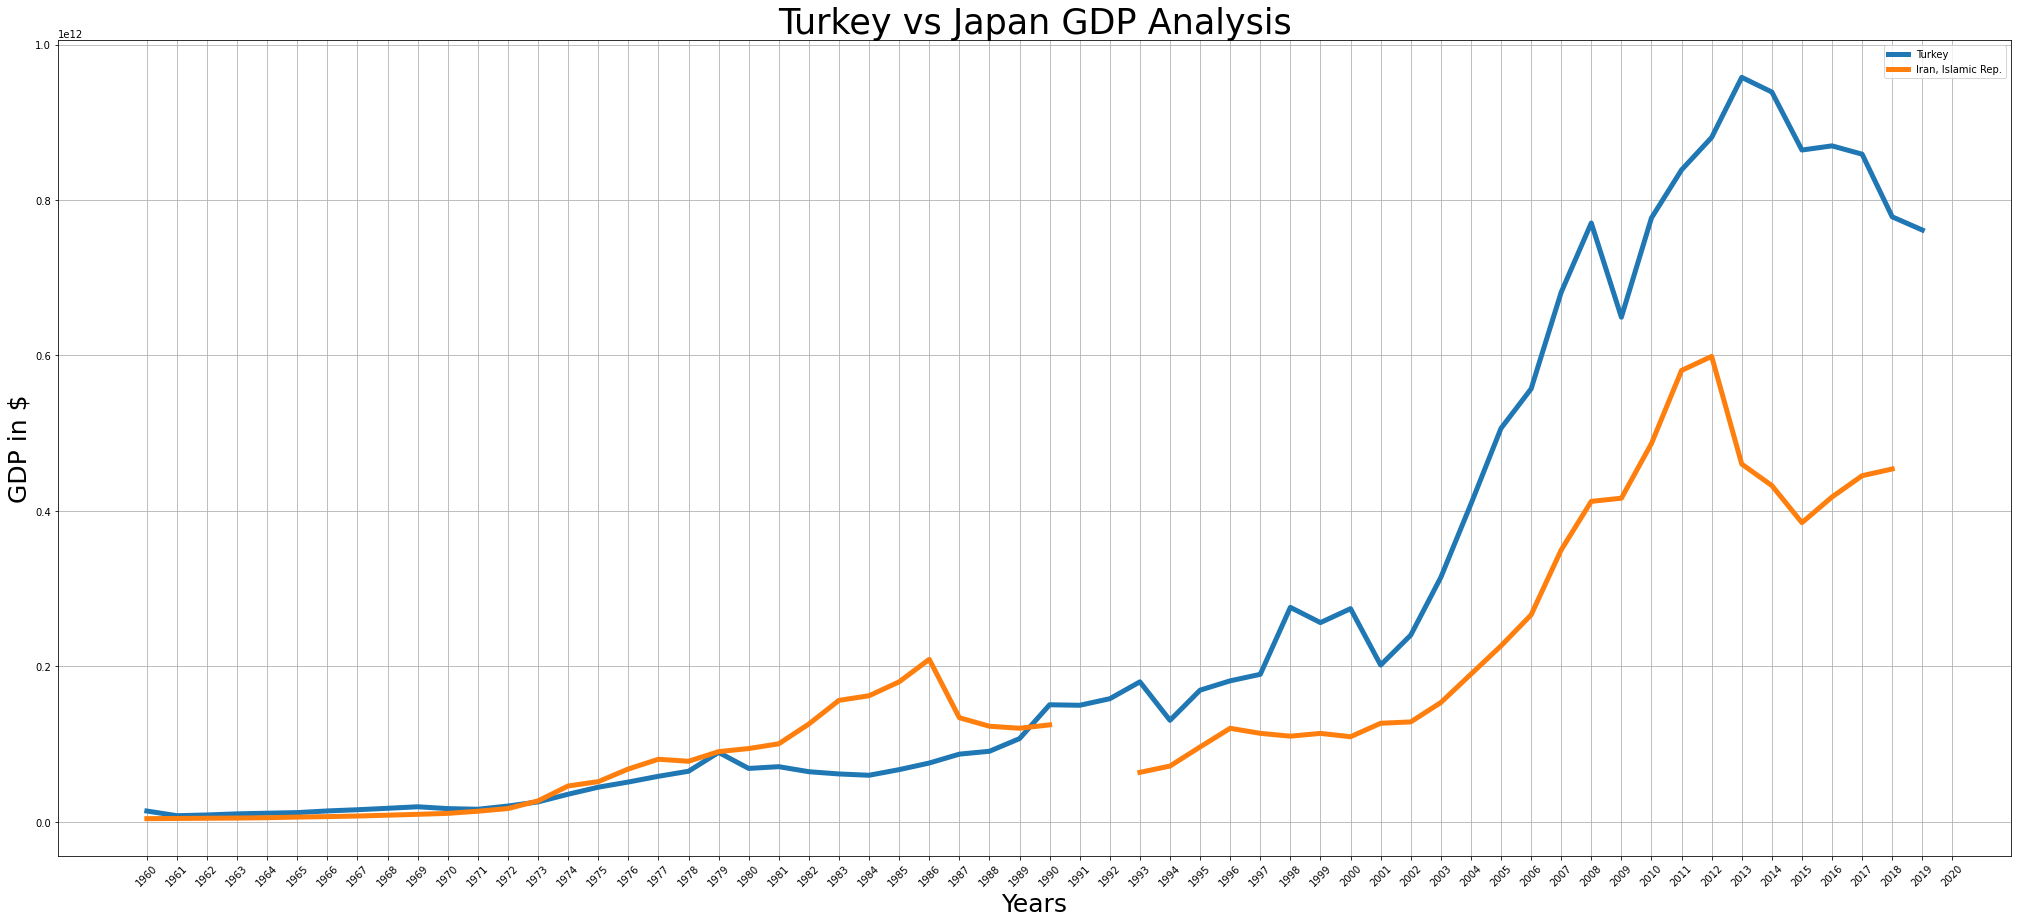

In [14]:
plt.figure(figsize=(35,15))
plt.title(label='Turkey vs Japan GDP Analysis',fontsize=35,fontweight=20)
plt.ylabel('GDP in $',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.plot(np.arange(1960,2021),only_countries_df.loc['Turkey'][3:64],linewidth=5,label='Turkey')
plt.plot(np.arange(1960,2021),only_countries_df.loc['Iran, Islamic Rep.'][3:64],linewidth=5,label='Iran, Islamic Rep.')
plt.xticks(np.arange(1960,2021),np.arange(1960,2021),rotation=45)
plt.grid()
plt.legend()
plt.show()

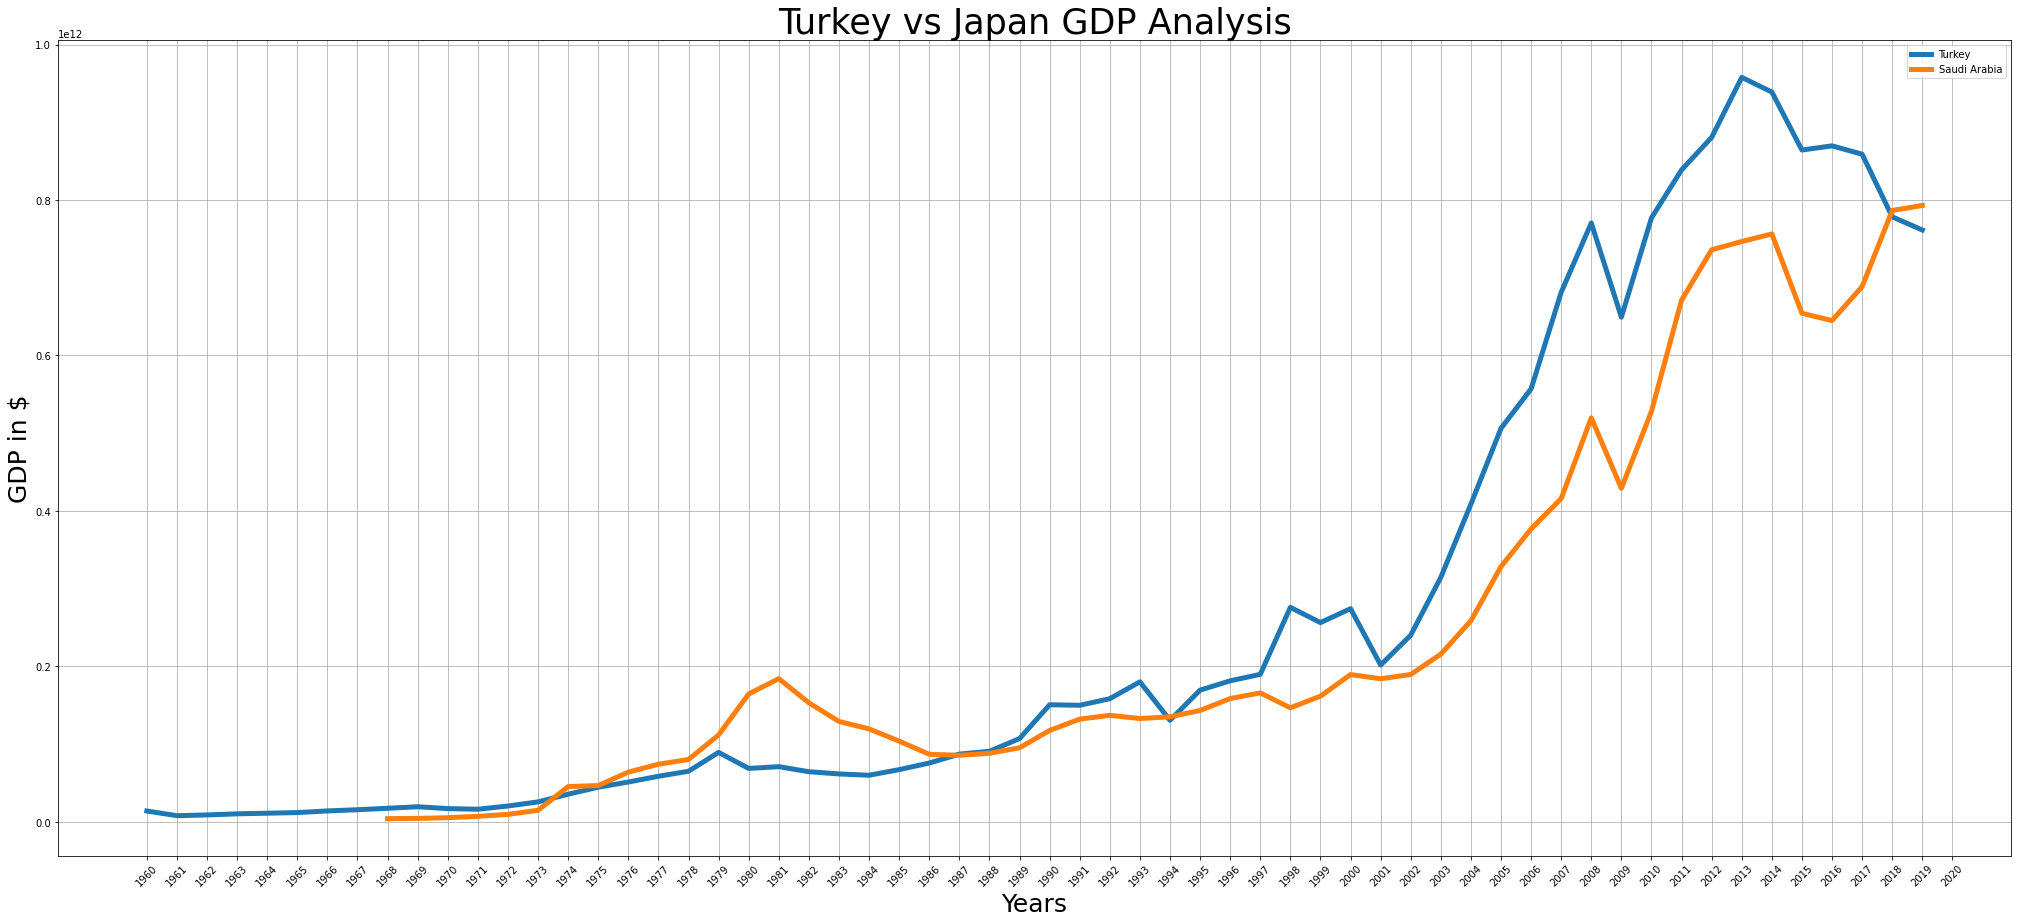

In [15]:
plt.figure(figsize=(35,15))
plt.title(label='Turkey vs Japan GDP Analysis',fontsize=35,fontweight=20)
plt.ylabel('GDP in $',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.plot(np.arange(1960,2021),only_countries_df.loc['Turkey'][3:64],linewidth=5,label='Turkey')
plt.plot(np.arange(1960,2021),only_countries_df.loc['Saudi Arabia'][3:64],linewidth=5,label='Saudi Arabia')
plt.xticks(np.arange(1960,2021),np.arange(1960,2021),rotation=45)
plt.grid()
plt.legend()
plt.show()

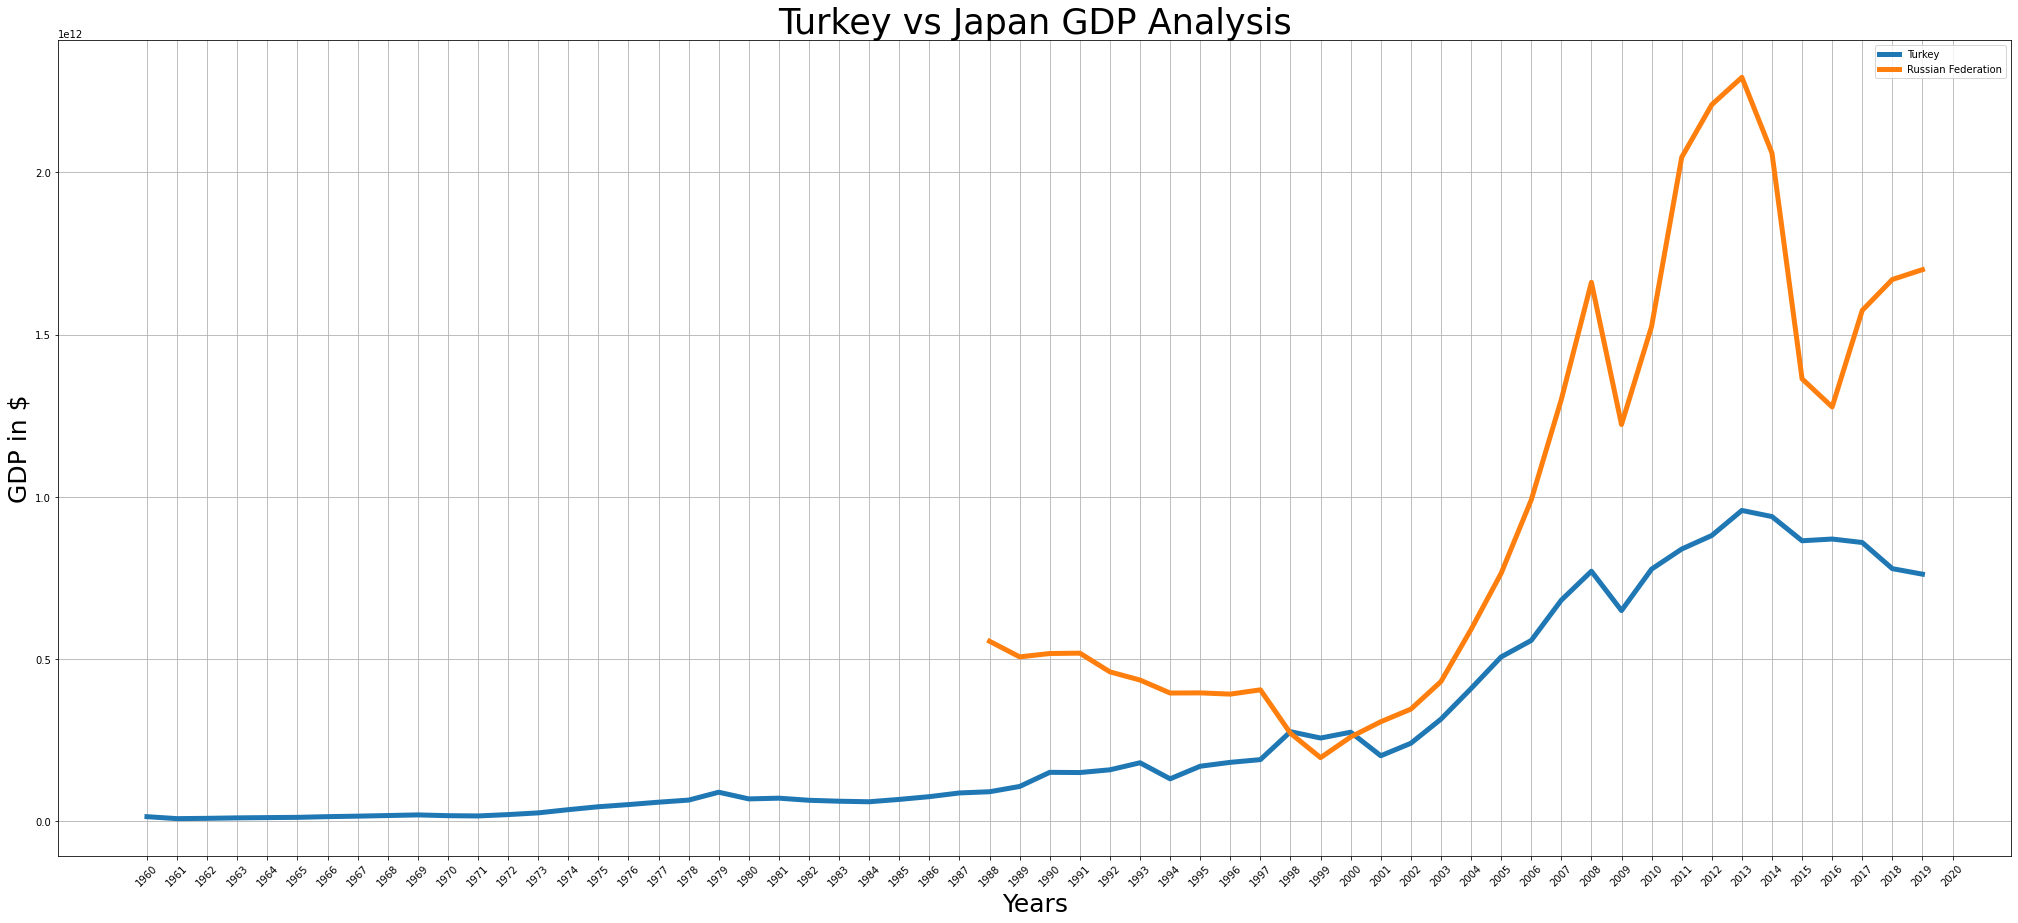

In [16]:
plt.figure(figsize=(35,15))
plt.title(label='Turkey vs Japan GDP Analysis',fontsize=35,fontweight=20)
plt.ylabel('GDP in $',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.plot(np.arange(1960,2021),only_countries_df.loc['Turkey'][3:64],linewidth=5,label='Turkey')
plt.plot(np.arange(1960,2021),only_countries_df.loc['Russian Federation'][3:64],linewidth=5,label='Russian Federation')
plt.xticks(np.arange(1960,2021),np.arange(1960,2021),rotation=45)
plt.grid()
plt.legend()
plt.show()

In [17]:

only_countries_df["world"]=only_countries_df.loc[:][3:64].sum()
    

In [18]:
only_countries_df

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65,world
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,NaN,NaN,NaN
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,NaN,NaN,NaN
Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,NaN,NaN,NaN
Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.700217e+08,7.569199e+08,7.883073e+08,7.993764e+08,8.321536e+08,8.214961e+08,8.522502e+08,NaN,NaN,NaN
"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.041524e+10,4.320647e+10,4.245062e+10,3.093598e+10,2.673614e+10,2.348627e+10,2.258108e+10,NaN,NaN,NaN
South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,1.235500e+10,...,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,3.514316e+11,NaN,NaN,NaN


KeyError: 'world'

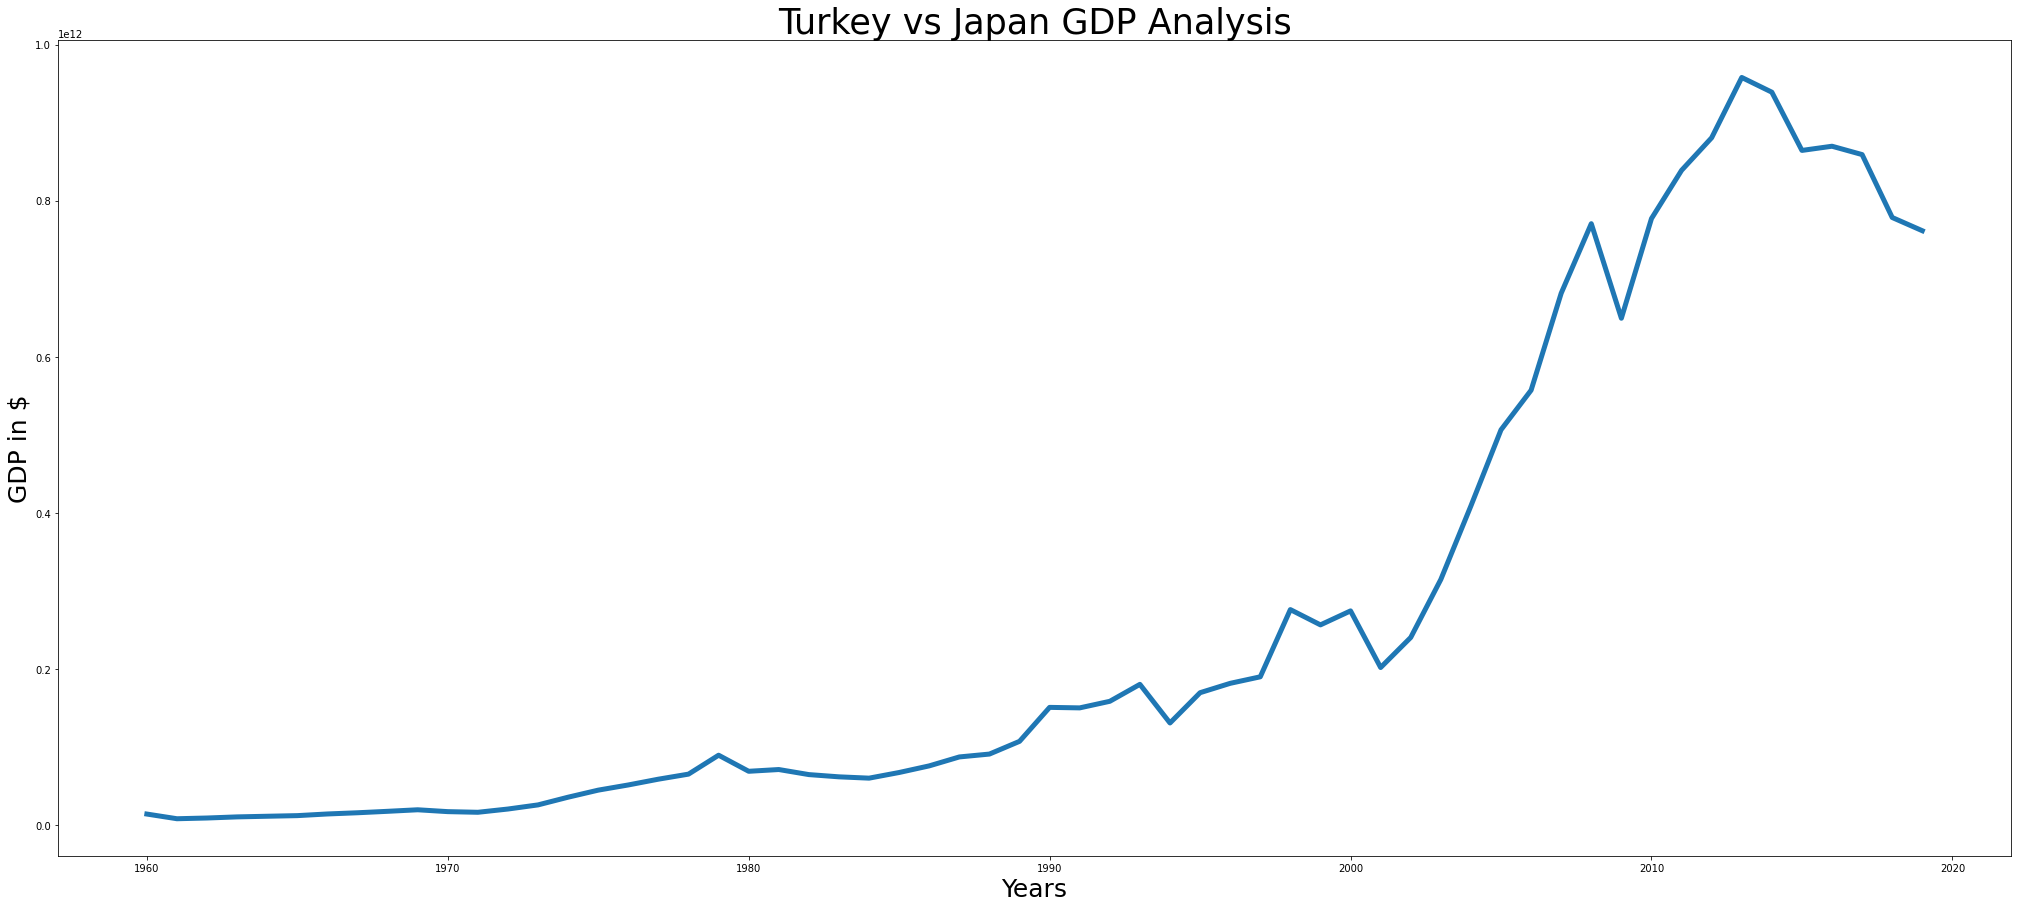

In [19]:
plt.figure(figsize=(35,15))
plt.title(label='Turkey vs Japan GDP Analysis',fontsize=35,fontweight=20)
plt.ylabel('GDP in $',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.plot(np.arange(1960,2021),only_countries_df.loc['Turkey'][3:64],linewidth=5,label='Turkey')
plt.plot(np.arange(1960,2021),only_countries_df.loc['world'][3:64],linewidth=5,label='world')
plt.xticks(np.arange(1960,2021),np.arange(1960,2021),rotation=45)
plt.grid()
plt.legend()
plt.show()

In [20]:
def get_this_country_plot(country):
    print(country+' GDP Summary')
    print()
    print('Mean : ',end='')
    print(only_countries_df.loc[country][3:64].mean())
    print('Total GDP Till Now: ',end='')
    print(only_countries_df.loc[country][3:64].sum())
    print('Maximum GDP : ',end='')
    print(only_countries_df.loc[country][3:64].max())
    print('Minimum GDP : ',end='')
    print(only_countries_df.loc[country][3:64].min())
    plt.figure(figsize=(35,15))
    plt.title(label=country+' GDP Analysis',fontsize=35,fontweight=20)
    plt.ylabel('GDP in $',fontsize=25)
    plt.xlabel('Years',fontsize=25)
    plt.plot(np.arange(1960,2021),only_countries_df.loc[country][3:64],linewidth=5)
    plt.xticks(np.arange(1960,2021),np.arange(1960,2021),rotation=45)
    plt.grid()
    plt.show()
    print()

Turkey GDP Summary

Mean : 271379147664.63364
Total GDP Till Now: 16282748859878.018
Maximum GDP : 957799371565.729
Minimum GDP : 7988888888.88889


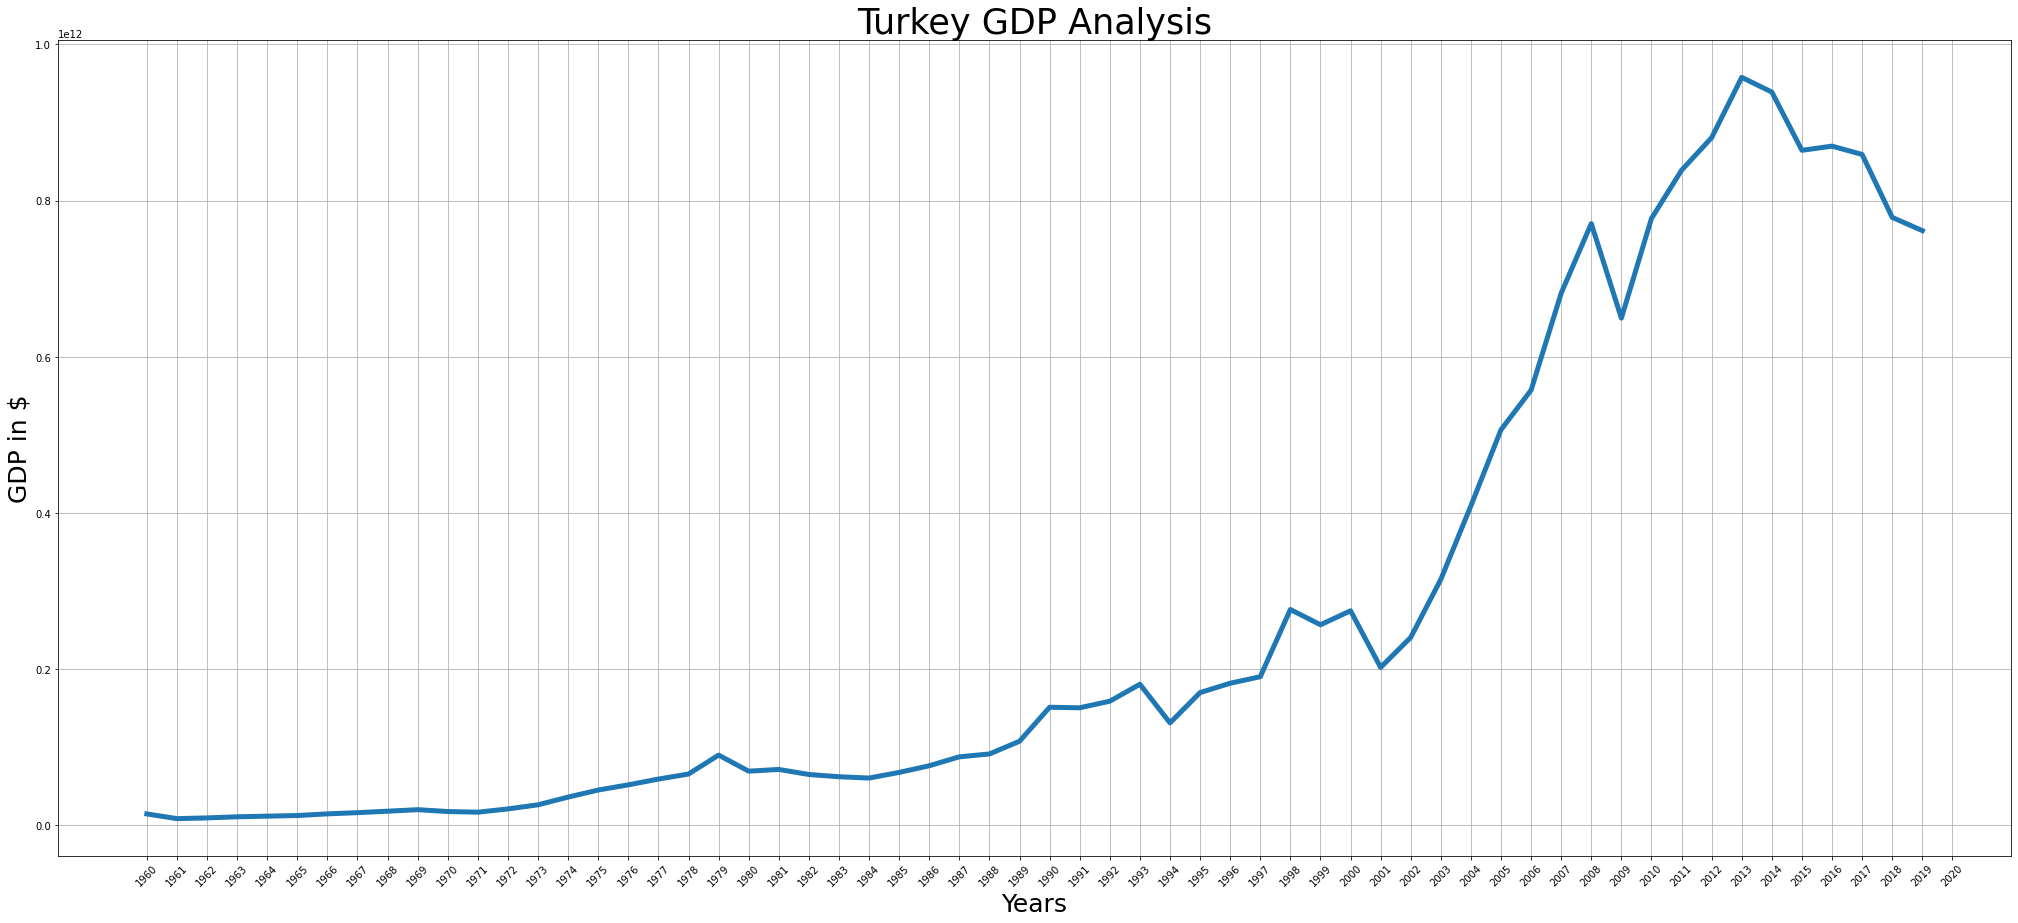


China GDP Summary

Mean : 2374241904152.0938
Total GDP Till Now: 142454514249125.62
Maximum GDP : 14279937467431.0
Minimum GDP : 47209359005.6057


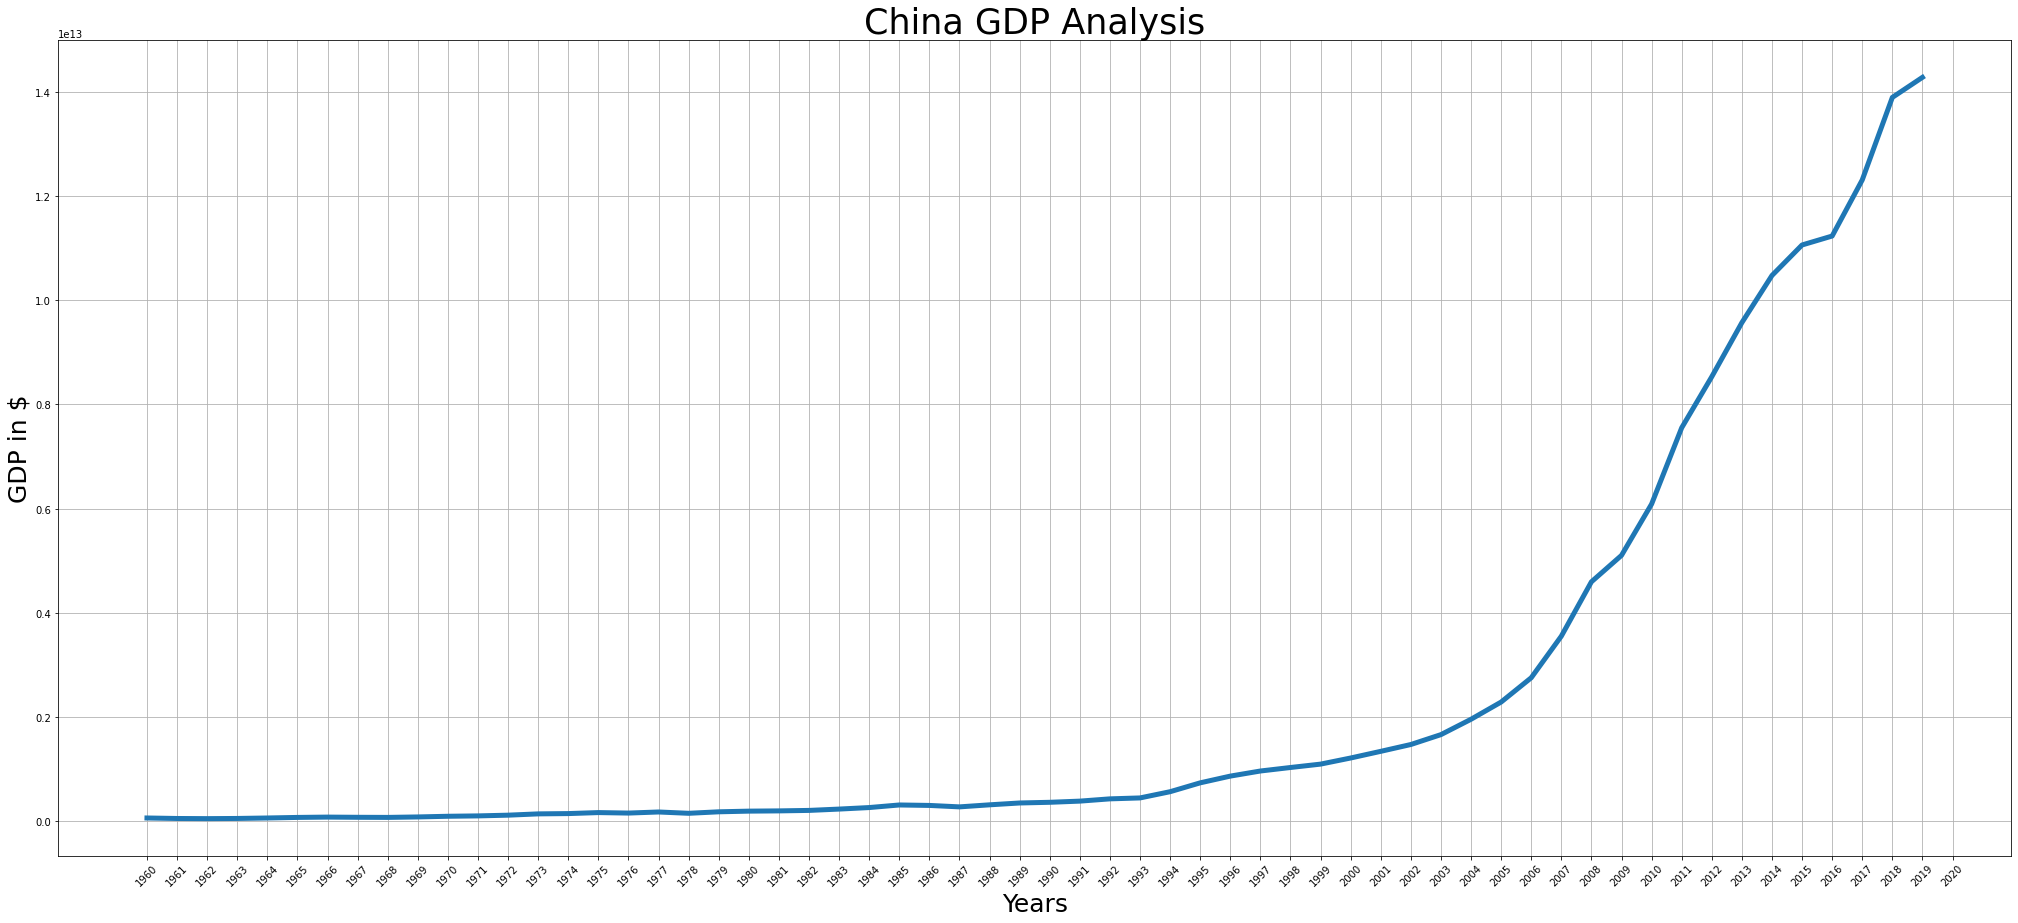


France GDP Summary

Mean : 1229240290314.3665
Total GDP Till Now: 73754417418861.98
Maximum GDP : 2918382891460.38
Minimum GDP : 62225478000.8822


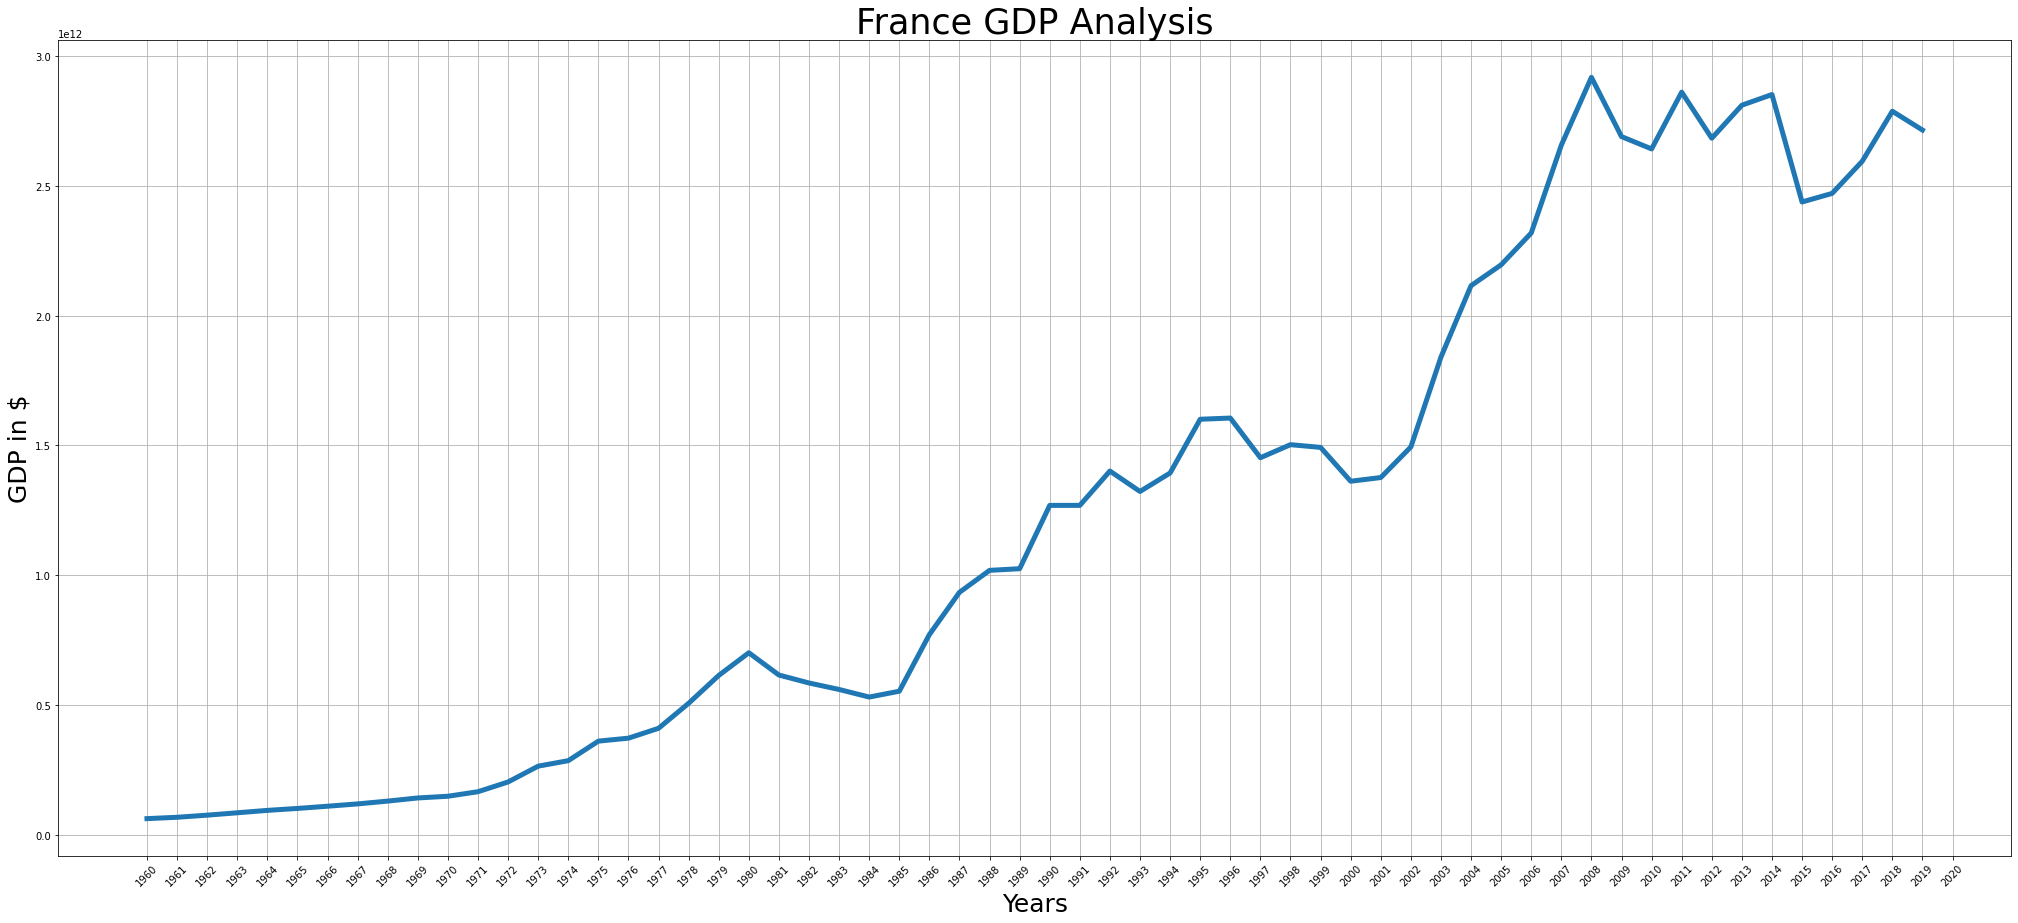


India GDP Summary

Mean : 625800469988.2048
Total GDP Till Now: 37548028199292.29
Maximum GDP : 2868929415617.02
Minimum GDP : 37029883875.4573


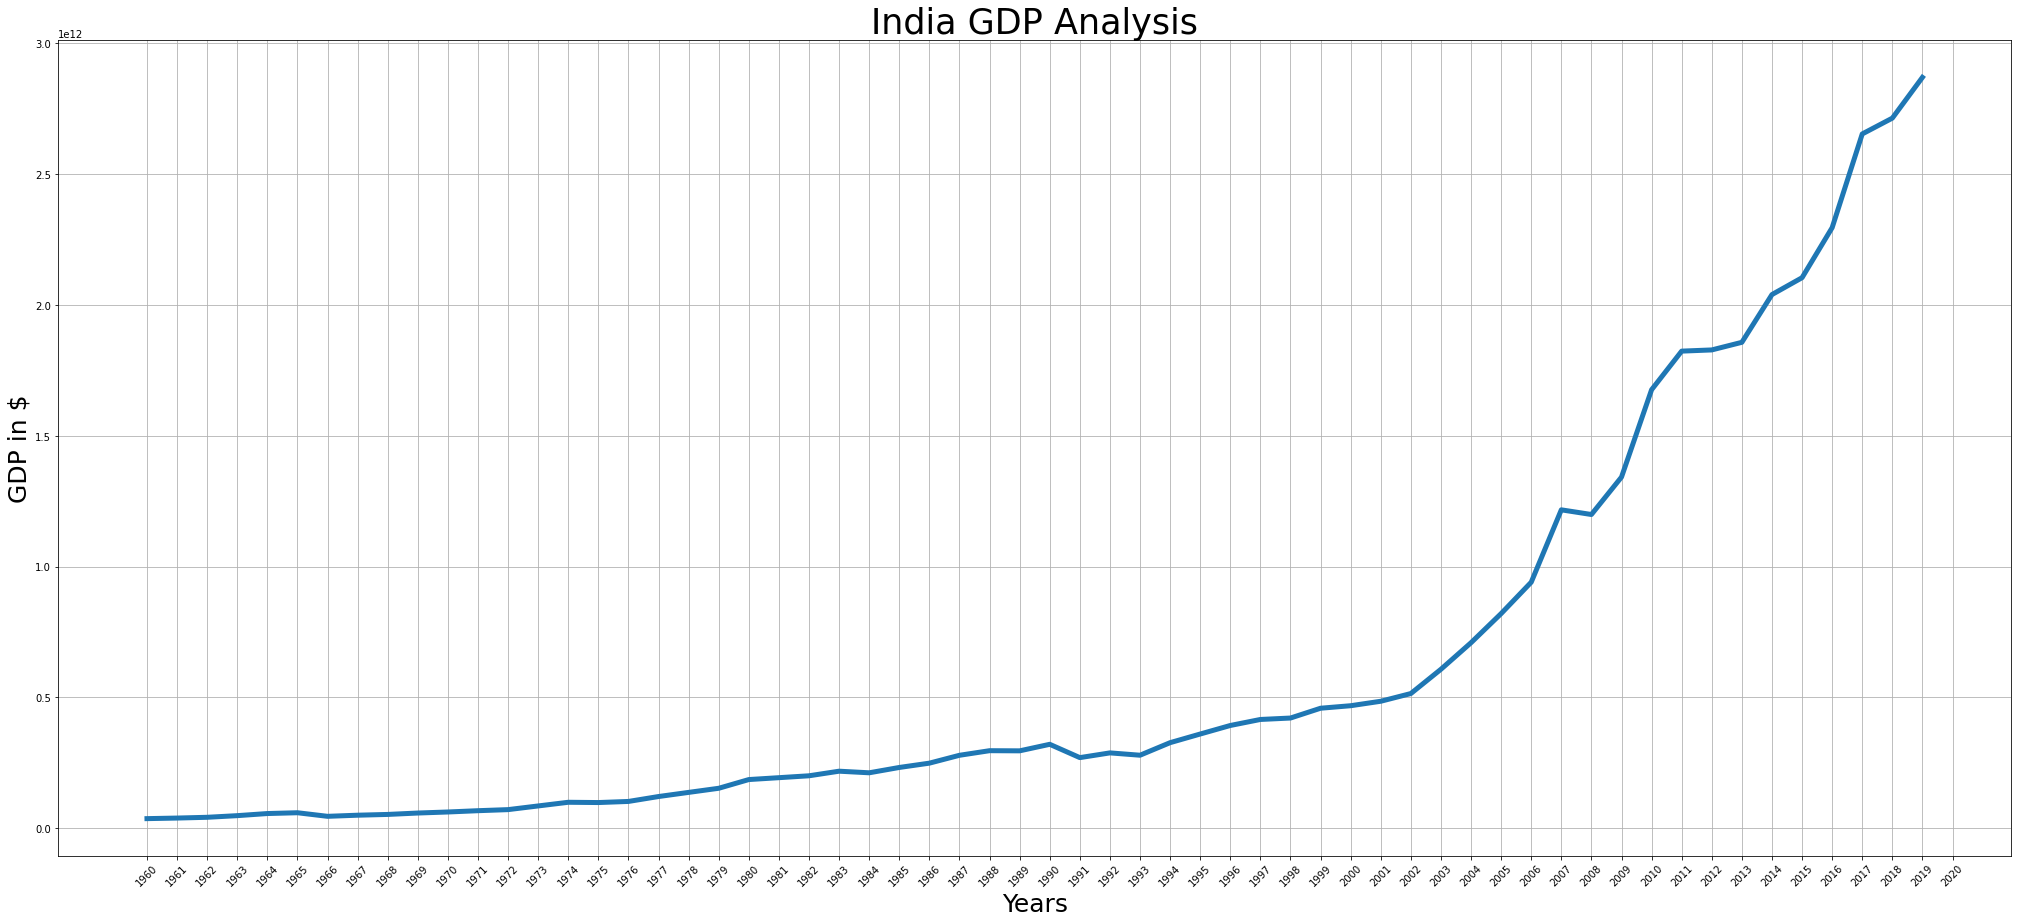

In [21]:
get_this_country_plot('Turkey')
get_this_country_plot('China')
get_this_country_plot('France')
get_this_country_plot('India')